In [1]:
                        # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or press'ing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/legaldf/traindf.csv


In [2]:
df=pd.read_csv("/kaggle/input/legaldf/traindf.csv")

In [3]:
len(df)

7030

In [4]:
df = df.dropna()

In [5]:
len(df)

7028

In [6]:
train=df

In [7]:
len(train)

7028

## using only Half size

In [8]:
# Assuming df is your original DataFrame

# Shuffle the DataFrame rows
df_shuffled = df.sample(frac=1, random_state=42)

# Calculate the number of rows for the train DataFrame (half of the size of df)
train_size = len(df) // 2

# Select the first half of the shuffled DataFrame as the train DataFrame
train = df_shuffled.iloc[:train_size]

# Display the size of the train DataFrame
print("Size of train DataFrame:", len(train))


Size of train DataFrame: 3514


In [9]:
from sklearn.model_selection import train_test_split

# # Assuming 'train' dataframe contains your data
# # Splitting the data into features (X) and target variable (y)
# X = train.drop(columns=['output'])  # Adjust 'target_column' with your actual target column name
# y = train['output']  # Adjust 'target_column' with your actual target column name

# # Splitting the data into train and test sets with a ratio of 70:30
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Now, X_train and y_train contain 70% of the data for training, and X_test and y_test contain 30% of the data for testing


In [10]:
# # Count null values in X_train
# null_count_X_train = X_train.isnull().sum()

# # Count null values in X_test
# null_count_X_test = X_test.isnull().sum()

# # Count null values in y_train
# null_count_y_train = y_train.isnull().sum()

# # Count null values in y_test
# null_count_y_test = y_test.isnull().sum()

# # Print the null counts for each dataframe
# print("Null counts in X_train:\n", null_count_X_train)
# print("\nNull counts in X_test:\n", null_count_X_test)
# print("\nNull counts in y_train:\n", null_count_y_train)
# print("\nNull counts in y_test:\n", null_count_y_test)


In [11]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.8.2 requires keras-core, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.5 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.

In [13]:
from transformers import BartTokenizer

checkpoint = 'facebook/bart-large-xsum' # Model
tokenizer = BartTokenizer.from_pretrained(checkpoint) # Loading Tokenizer


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

In [14]:
from transformers import BartTokenizer, BartForConditionalGeneration, pipeline

# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model='facebook/bart-large-xsum')

# Loading Tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-xsum')

# Loading Model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-xsum')


2024-05-10 15:00:49.438469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 15:00:49.438621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 15:00:49.575447: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

In [15]:
print(model)

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): La

In [16]:
# # Transformers
# from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
# from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
# from transformers import pipeline                                         # Pipeline
# from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data 
# import torch                                                              # PyTorch
# import evaluate                                                           # Hugging Face's library for model evaluation


# # Other NLP libraries
# from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
# from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
# import re                                                                 # This library allows us to clean text data
# import nltk                                                               # Natural Language Toolkit
# nltk.download('punkt') 

In [17]:
!nvidia-smi # Checking GPU
!pip install transformers # Installing the transformers library (https://huggingface.co/docs/transformers/index)

Fri May 10 15:01:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              25W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [18]:
!pip install datasets # Installing the datasets library (https://huggingface.co/docs/datasets/index)

In [19]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.4 MB/s eta 0:00:00


In [20]:
!pip install rouge-score
!pip install py7zr # Installing library to save zip archives (https://pypi.org/project/py7zr/)
# Transformers
from transformers import BartTokenizer, BartForConditionalGeneration      # BERT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data 
import torch                                                              # PyTorch
import evaluate                                                           # Hugging Face's library for model evaluation


# Other NLP libraries
from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=8f5d34bd5aa0bf24fe36ea1a03e183c0abcec2340742df654498ec302e4fe0e1
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 26.3 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9

True

In [21]:
def compute_tfidf(df_column, ngram_range=(1,1), max_features=15):
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english', ngram_range=ngram_range)
    x = vectorizer.fit_transform(df_column.fillna(''))
    df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
    return df_tfidfvect

In [22]:
def plot_correlation(df, title, subtitle, height, width, font_size):
    '''
    This function is resposible to plot a correlation map among features in the dataset.

    Parameters:
    height = Define height
    width = Define width
    font_size = Define the font size for the annotations
    '''
    corr = np.round(df.corr(numeric_only = True), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])



    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = colormap)

    fig.update_layout(title = {'text': f"<b>{title} Heatmap<br><sup>&nbsp;&nbsp;&nbsp;&nbsp;<i>{subtitle}</i></sup></b>",
                                'x': .025, 'xanchor': 'left', 'y': .95},
                    margin = dict(t=210, l = 110),
                    yaxis = dict(autorange = 'reversed', showgrid = False),
                    xaxis = dict(showgrid = False),
                    template = template,
                    #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                    height = height, width = width)


    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = colormap,
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    for i in range(len(fig.layout.annotations)):
        fig.layout.annotations[i].font.size = font_size

    fig.show()

In [23]:

def histogram_boxplot(df,hist_color, box_color, height, width, legend, name):
    '''
    This function plots a Histogram and a Box Plot side by side

    Parameters:
    hist_color = The color of the histogram
    box_color = The color of the boxplots
    heigh and width = Image size
    legend = Either to display legend or not
    '''

    features = df.select_dtypes(include = [np.number]).columns.tolist()

    for feat in features:
        try:
            fig = make_subplots(
                rows=1,
                cols=2,
                subplot_titles=["Box Plot", "Histogram"],
                horizontal_spacing=0.2
            )

            density = gaussian_kde(df[feat])
            x_vals = np.linspace(min(df[feat]), max(df[feat]), 200)
            density_vals = density(x_vals)

            fig.add_trace(go.Scatter(x=x_vals, y = density_vals, mode = 'lines',
                                     fill = 'tozeroy', name="Density", line_color=hist_color), row=1, col=2)
            fig.add_trace(go.Box(y=df[feat], name="Box Plot", boxmean=True, line_color=box_color), row=1, col=1)

            fig.update_layout(title={'text': f'<b>{name} Word Count<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat}</i></sup></b>',
                                     'x': .025, 'xanchor': 'left'},
                             margin=dict(t=100),
                             showlegend=legend,
                             template = template,
                             #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                             height=height, width=width
                            )

            fig.update_yaxes(title_text=f"<b>Words</b>", row=1, col=1, showgrid=False)
            fig.update_xaxes(title_text="", row=1, col=1, showgrid=False)

            fig.update_yaxes(title_text="<b>Frequency</b>", row=1, col=2,showgrid=False)
            fig.update_xaxes(title_text=f"<b>Words</b>", row=1, col=2, showgrid=False)

            fig.show()
            print('\n')
        except Exception as e:
            print(f"An error occurred: {e}")

In [24]:

def display_feature_list(features, feature_type):

    '''
    This function displays the features within each list for each type of data
    '''

    print(f"\n{feature_type} Features: ")
    print(', '.join(features) if features else 'None')

def describe_df(df):
    """
    This function prints some basic info on the dataset and
    sets global variables for feature lists.
    """

    global categorical_features, continuous_features, binary_features
    categorical_features = [col for col in df.columns if df[col].dtype == 'object']
    binary_features = [col for col in df.columns if df[col].nunique() <= 2 and df[col].dtype != 'object']
    continuous_features = [col for col in df.columns if df[col].dtype != 'object' and col not in binary_features]

    print(f"\n{type(df).__name__} shape: {df.shape}")
    print(f"\n{df.shape[0]:,.0f} samples")
    print(f"\n{df.shape[1]:,.0f} attributes")
    print(f'\nMissing Data: \n{df.isnull().sum()}')
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData Types: \n{df.dtypes}')

    #negative_valued_features = [col for col in df.columns if (df[col] < 0).any()]
    #print(f'\nFeatures with Negative Values: {", ".join(negative_valued_features) if negative_valued_features else "None"}')

    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary')

    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [25]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model = 'facebook/bart-large-xsum')

In [26]:
news = '''Bobi, the world’s oldest dog ever, has died after reaching the almost inconceivable age of 31 years and 165 days, said Guinness World Records (GWR) on Monday.
His death at an animal hospital on Friday was initially announced by veterinarian Dr. Karen Becker.
She wrote on Facebook that “despite outliving every dog in history, his 11,478 days on earth would never be enough, for those who loved him.”
There were many secrets to Bobi’s extraordinary old age, his owner Leonel Costa told GWR in February. He always roamed freely, without a leash or chain, lived in a “calm, peaceful” environment and ate human food soaked in water to remove seasonings, Costa said.
He spent his whole life in Conqueiros, a small Portuguese village about 150 kilometers (93 miles) north of the capital Lisbon, often wandering around with cats.
Bobi was a purebred Rafeiro do Alentejo – a breed of livestock guardian dog – according to his owner. Rafeiro do Alentejos have a life expectancy of about 12-14 years, according to the American Kennel Club.
But Bobi lived more than twice as long as that life expectancy, surpassing an almost century-old record to become the oldest living dog and the oldest dog ever – a title which had previously been held by Australian cattle-dog Bluey, who was born in 1910 and lived to be 29 years and five months old.
However, Bobi’s story almost had a different ending.
When he and his three siblings were born in the family’s woodshed, Costa’s father decided they already had too many animals at home.
Costa and his brothers thought their parents had taken all the puppies away to be destroyed. However, a few sad days later, they found Bobi alive, safely hidden in a pile of logs.
The children hid the puppy from their parents and, by the time Bobi’s existence became known, he was too old to be put down and went on to live his record-breaking life.
His 31st birthday party in May was attended by more than 100 people and a performing dance troupe, GWR said.
His eyesight deteriorated and walking became harder as Bobi grew older but he still spent time in the backyard with the cats, rested more and napped by the fire.
“Bobi is special because looking at him is like remembering the people who were part of our family and unfortunately are no longer here, like my father, my brother, or my grandparents who have already left this world,” Costa told GWR in May. “Bobi represents those generations.”
'''
summarizer(news) # Using the pipeline to generate a summary of the text above

[{'summary_text': 'The world’s oldest dog has died, Guinness World Records has confirmed.'}]

In [27]:
df

,input,output
0,criminal Appeal No. 47 of 1963. Appeal by spec...,"The appellant published in his paper, which ha..."
1,criminal Appeal No. 210 of 1963. Appeal by spe...,On the first information report lodged by the ...
2,Civil Appeal No. 2618 of 1983. From the Judgme...,The first respondent who lost to the appellant...
3,civil Appeal No. 2991 of 1986. From the Judgme...,The appellant was sought to be evicted under s...
4,Civil Appeal No. 1733 of 1973. From the Judgme...,A firm (JTC) obtained the sole selling agency ...
...,...,...
7025,Appeals Nos. 98 and 99 of 1957. Appeals from t...,In order to put the sugar industry on a stable...
7026,Civil Appeal No. 1931 of 1969. Appeal by Speci...,In the eviction suit filed by the respondents ...
7027,Appeal No. 81 of 1990. From the Judgment and O...,Under Section 21(a) of the Rajasthan Civil Cou...
7028,civil Appeal No. 1993 of 1982. From the Judgme...,The respondent was the daughter of the origina...


In [28]:
# Assuming df is your original DataFrame

# Shuffle the DataFrame rows
df_shuffled = df.sample(frac=1, random_state=42)

# Calculate the number of rows for the train DataFrame (70% of the size of df)
train_size = int(len(df_shuffled) * 0.7)

# Select the first 70% of the shuffled DataFrame as the train DataFrame
df_train = df_shuffled.iloc[:train_size]

# Display the size of the train DataFrame
print("Size of train DataFrame:", len(df_train))


Size of train DataFrame: 4919


In [29]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
# Splitting the DataFrame into train and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)




In [30]:
train_df

,input,output
4712,Civil Appeal No. 712 of 1972. From the Judgmen...,These appeals arise from a common demand for t...
3941,civil Appeal No. 5 19521 of 1975. From the Jud...,"The assessee, manufacturer of strawboard, clai..."
3390,il Appeal No. 431 of 1976. (Appeal by Special ...,Section 284 of Chapter VI of the Bombay Provi...
1631,Appeal No. 806 of 1964. Appeal by special leav...,A Hindu died after making a will in respect of...
4083,399 of 1952. Petition under article 32 of the ...,Section 11 A which was inserted in the of 1950...
...,...,...
3774,Civil Appeal No. 1068 of 1987. From the Judgme...,"% The first respondent, an employee of the app..."
5193,Appeals Nos. 396 413 of 1963. Appeals by speci...,The appellants were carrying on the business o...
5228,tition No. 1756 of 1981 etc. Under Article 32 ...,"Until the academic session 1978 79, the Post G..."
5392,Appeals Nos. 47 and 48 of 1961. Appeals by spe...,The Municipality filed two suits to claim refu...


In [31]:
train_df.reset_index(drop=True, inplace=True)


In [32]:
train_df

,input,output
0,Civil Appeal No. 712 of 1972. From the Judgmen...,These appeals arise from a common demand for t...
1,civil Appeal No. 5 19521 of 1975. From the Jud...,"The assessee, manufacturer of strawboard, clai..."
2,il Appeal No. 431 of 1976. (Appeal by Special ...,Section 284 of Chapter VI of the Bombay Provi...
3,Appeal No. 806 of 1964. Appeal by special leav...,A Hindu died after making a will in respect of...
4,399 of 1952. Petition under article 32 of the ...,Section 11 A which was inserted in the of 1950...
...,...,...
4914,Civil Appeal No. 1068 of 1987. From the Judgme...,"% The first respondent, an employee of the app..."
4915,Appeals Nos. 396 413 of 1963. Appeals by speci...,The appellants were carrying on the business o...
4916,tition No. 1756 of 1981 etc. Under Article 32 ...,"Until the academic session 1978 79, the Post G..."
4917,Appeals Nos. 47 and 48 of 1961. Appeals by spe...,The Municipality filed two suits to claim refu...


In [33]:
test_df.reset_index(drop=True, inplace=True)


In [34]:
test_df

,input,output
0,criminal Appeal No. 146 of 1954. Appeal from t...,The appellant was a Class III servant employed...
1,Appeal No. 271 of 1956. Appeal from the judgme...,By an order passed under section 4 A of the Ce...
2,Appeal No. 30 of 1958. Appeal by special leave...,The appellant entered into contract with Gover...
3,civil Appeal No. 1294 (NT) of 1975. From the J...,"Under articles 4, 81 and 82 of the Articles of..."
4,No. 182 of 1966. Petition under article 32 of ...,"The All India Services Act, 1951, empowers the..."
...,...,...
2104,"civil Appeals Nos. 243, 344 and 45 of 59. Appe...",Although section 135 of the Indian Contract Ac...
2105,Appeal No. 150 of 1953. Appeal by Special Leav...,Article 136 of the Constitution is worded in t...
2106,been clearly mentioned that they shall be deem...,A settlement was arrived at on 22.2.1972 betwe...
2107,Civil Appeal No.169 of 1958. Appeal by special...,"Section 25F(b) of the , provided ""No workman e..."


In [35]:
def preprocess_function(examples):
    inputs = [doc for doc in examples["input"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["output"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [36]:
train_df.columns

Index(['input', 'output'], dtype='object')

In [37]:
from datasets import Dataset

# Assuming you have already imported the necessary tokenizer and initialized it

def preprocess_function(examples):
    inputs = [doc for doc in examples["input"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["output"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Convert the DataFrame to a Dataset
train_ds = Dataset.from_pandas(train_df)

# Apply the preprocess_function to the datasets
tokenized_train = train_ds.map(preprocess_function, batched=True,
                               remove_columns=['input', 'output'])

# Assuming tokenizer is already initialized


Map:   0%|          | 0/4919 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:3935: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [38]:
tokenized_train

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 4919
})

In [39]:


# Convert the DataFrame to a Dataset
test_ds = Dataset.from_pandas(test_df)

# Apply the preprocess_function to the datasets
tokenized_test = test_ds.map(preprocess_function, batched=True,
                               remove_columns=['input', 'output'])



Map:   0%|          | 0/2109 [00:00<?, ? examples/s]

In [40]:
test_ds

Dataset({
    features: ['input', 'output'],
    num_rows: 2109
})

In [41]:
tokenized_test

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2109
})

In [42]:
# Selecting a sample from the dataset
sample = tokenized_train[0]

# Printing its features
print("input_ids:")
print(sample['input_ids'])
print("\n")
print("attention_mask:")
print(sample['attention_mask'])
print("\n")
print("sample:")
print(sample['labels'])
print("\n")

input_ids:
[0, 41044, 16049, 440, 4, 262, 1092, 9, 15002, 4, 1740, 5, 44319, 8, 9729, 7000, 733, 132, 15002, 9, 5, 20788, 7826, 755, 837, 11, 5280, 1437, 40135, 4, 44740, 440, 4, 195, 32145, 73, 5339, 4, 262, 4956, 5280, 16049, 29603, 4, 361, 5379, 361, 4027, 9, 15002, 1740, 5, 19691, 30237, 8, 32335, 7000, 501, 132, 15002, 73, 2146, 132, 15002, 9, 5, 20788, 7826, 755, 837, 11, 5280, 44740, 440, 4, 33452, 73, 5339, 6, 204, 35534, 73, 5339, 6, 8, 30242, 306, 73, 5339, 4, 5280, 16049, 440, 4, 6560, 246, 9, 15002, 4, 1740, 5, 44319, 8, 9729, 7000, 501, 132, 15002, 9, 5, 20788, 7826, 755, 837, 11, 5280, 40135, 4, 44740, 440, 4, 974, 6468, 73, 5339, 4, 5280, 16049, 29603, 4, 158, 5449, 158, 3506, 9, 15002, 4, 1740, 5, 44319, 8, 9729, 7000, 733, 73, 2036, 132, 15002, 9, 5, 20788, 7826, 755, 837, 11, 5280, 44740, 29603, 4, 195, 4956, 6, 290, 3897, 8, 365, 4563, 73, 4956, 4, 5280, 16049, 29603, 4, 158, 4280, 359, 158, 4111, 9, 15002, 4, 1740, 5, 44319, 8, 9729, 7000, 733, 73, 2036, 1187, 1927,

In [43]:
# Instantiating Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [44]:
from datasets import load_metric

# Load the ROUGE metric
metric = load_metric('rouge')


/tmp/ipykernel_34/856087688.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('rouge')
/opt/conda/lib/python3.10/site-packages/datasets/load.py:756: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [45]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred# Obtaining predictions and true labels
    
    # Decoding predictions
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    
    # Obtaining the true labels tokens, while eliminating any possible masked token (i.e., label = -100)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    
    
    # Computing rouge score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()} # Extracting some results

    # Add mean-generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [46]:
seed=42

In [47]:
# Defining parameters for training
'''
Please don't forget to check the documentation.
Both the Seq2SeqTrainingArguments and Seq2SeqTrainer classes have quite an extensive list of parameters.

doc: https://huggingface.co/docs/transformers/v4.34.1/en/main_classes/trainer

'''
training_args = Seq2SeqTrainingArguments(
    output_dir = 'bart_legal',
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'eval_loss',
    seed = seed,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=4,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

In [48]:
tokenized_test

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 2109
})

In [49]:
# Defining Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [50]:
trainer.train()   # Training model

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.900900,1.705317,37.295600,19.010500,27.331900,33.672200,61.939300
2,1.598300,1.649078,37.856400,19.503000,27.694400,34.220700,61.875800
3,1.426600,1.625322,37.946800,19.515700,27.707100,34.155300,61.968200
4,1.310600,1.634171,38.184600,19.712500,27.943300,34.381600,61.955000


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a G

TrainOutput(global_step=2460, training_loss=1.4997407494521722, metrics={'train_runtime': 13496.9934, 'train_samples_per_second': 1.458, 'train_steps_per_second': 0.182, 'total_flos': 4.263995015115571e+16, 'train_loss': 1.4997407494521722, 'epoch': 4.0})

In [51]:
# Saving model to a custom directory
directory = "legal_model"
trainer.save_model(directory)

# Saving model tokenizer
tokenizer.save_pretrained(directory)



Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


('legal_model/tokenizer_config.json',
 'legal_model/special_tokens_map.json',
 'legal_model/vocab.json',
 'legal_model/merges.txt',
 'legal_model/added_tokens.json')

In [70]:
validation = trainer.evaluate(eval_dataset = tokenized_test)
print(validation)

{'eval_loss': 1.6253222227096558, 'eval_rouge1': 37.9468, 'eval_rouge2': 19.5157, 'eval_rougeL': 27.7071, 'eval_rougeLsum': 34.1553, 'eval_gen_len': 61.9682, 'eval_runtime': 2073.0281, 'eval_samples_per_second': 1.017, 'eval_steps_per_second': 0.255, 'epoch': 4.0}


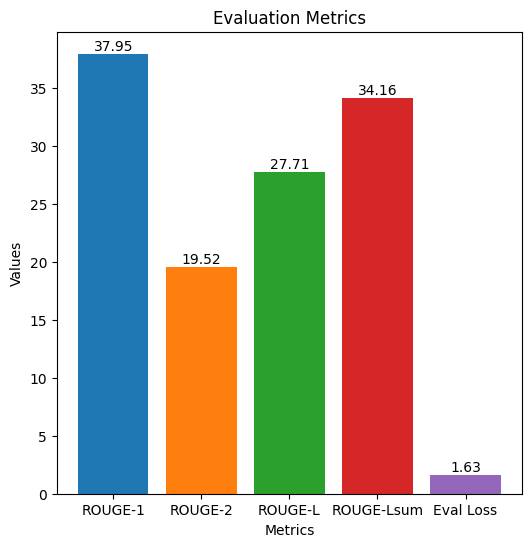

In [79]:
import matplotlib.pyplot as plt

# Extract the ROUGE evaluation metrics and eval_loss
rouge1 = validation['eval_rouge1']
rouge2 = validation['eval_rouge2']
rougeL = validation['eval_rougeL']
rougeLsum = validation['eval_rougeLsum']
eval_loss = validation['eval_loss']

# Create lists for plotting
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum', 'Eval Loss']
values = [rouge1, rouge2, rougeL, rougeLsum, eval_loss]

# Define professional colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting
plt.figure(figsize=(6, 6))
bars = plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')

# Add values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, round(value, 2), ha='center', va='bottom')

plt.show()


In [71]:
import shutil

# Define the directory to be zipped
directory = "legal_model"

# Create a zip file of the directory
shutil.make_archive(directory, 'zip', directory)

# Move the created zip file to another location
shutil.move(f'{directory}.zip', '/kaggle/working/bart_finetuned_legal.zip')


'/kaggle/working/bart_finetuned_legal.zip'

In [84]:
pip install python-docx


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


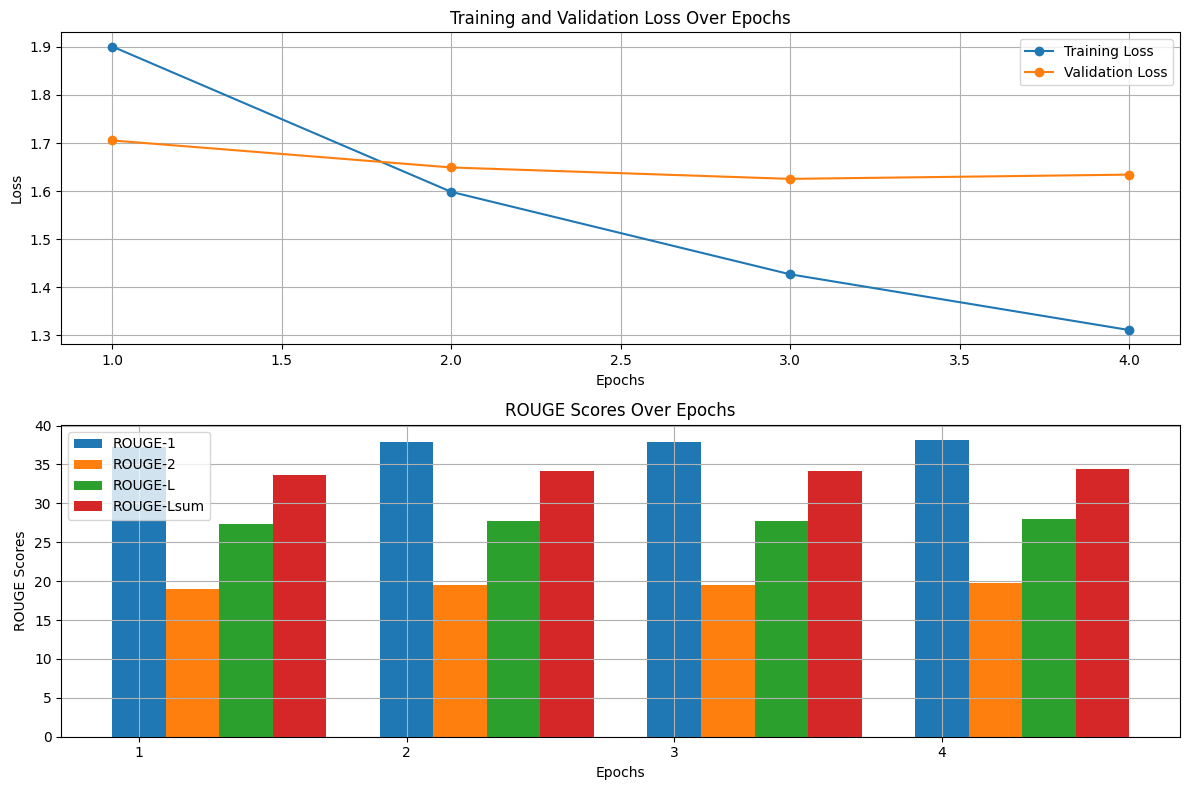

In [86]:
import matplotlib.pyplot as plt
from docx import Document
from docx.shared import Inches

# Data
epochs = [1, 2, 3, 4]
training_loss = [1.900900, 1.598300, 1.426600, 1.310600]
validation_loss = [1.705317, 1.649078, 1.625322, 1.634171]
rouge1 = [37.295600, 37.856400, 37.946800, 38.184600]
rouge2 = [19.010500, 19.503000, 19.515700, 19.712500]
rougeL = [27.331900, 27.694400, 27.707100, 27.943300]
rougeLsum = [33.672200, 34.220700, 34.155300, 34.381600]

# Plotting
plt.figure(figsize=(12, 8))

# Training and Validation Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, training_loss, marker='o', label='Training Loss')
plt.plot(epochs, validation_loss, marker='o', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# ROUGE Scores
plt.subplot(2, 1, 2)
bar_width = 0.2
index = [epoch - 0.3 * (len(rouge1) - 1) for epoch in epochs]
plt.bar(index, rouge1, bar_width, label='ROUGE-1')
plt.bar([i + bar_width for i in index], rouge2, bar_width, label='ROUGE-2')
plt.bar([i + 2 * bar_width for i in index], rougeL, bar_width, label='ROUGE-L')
plt.bar([i + 3 * bar_width for i in index], rougeLsum, bar_width, label='ROUGE-Lsum')
plt.title('ROUGE Scores Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('ROUGE Scores')
plt.xticks(index, epochs)
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save the plot as an image file
plt.savefig('training_plot.png')

# Create a Word document
doc = Document()
doc.add_heading('Training Report', level=1)

# Add the plot to the Word document
doc.add_picture('training_plot.png', width=Inches(6))

# Save the Word document
doc.save('training_report.docx')
